This notebook walks through the level 2 analyses of a single subject for Developmental differences in learning from large losses study. Details of the behavioral analyses can be found [here](https://zenkavi.github.io/DevStudy_Analyses/output/reports/DevStudy_MG_Behavior.nb.html).

Import packages

In [1]:
import glob
import math
import nibabel as nib
from nistats.second_level_model import SecondLevelModel
import numpy as np
import os
import pandas as pd
import pickle
import re

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:2

Import plotting packages

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from nistats.reporting import plot_design_matrix, plot_contrast_matrix
import nilearn.plotting

%matplotlib inline

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Declare arguments

In [3]:
subnum = '400742'
pe = True
data_loc = os.environ['DATA_LOC']

Make input and output paths

In [4]:
in_path = "%s/derivatives/nistats/level_1/sub-%s/contrasts"%(data_loc,subnum)

out_path = "%s/derivatives/nistats/level_2/sub-%s"%(data_loc,subnum)
if not os.path.exists(out_path):
    os.mkdir(out_path)

contrasts_path = "%s/contrasts"%(out_path)
if not os.path.exists(contrasts_path):
    os.mkdir(contrasts_path)

sub_contrasts = os.listdir(in_path)

Declare contrasts of interest

In [5]:
if pe:
    contrasts = ['m1.', 'm2.', 'm3.', 'm4.', 'm1_rt', 'm2_rt', 'm3_rt', 'm4_rt', 'hpe', 'lpe', 'pe', 'junk', 'task_on', 'rt', 'var_sen', 'ev_sen']
else:
    contrasts = ['m1.', 'm2.', 'm3.', 'm4.', 'm1_rt', 'm2_rt', 'm3_rt', 'm4_rt', 'gain.', 'loss.', 'junk', 'task_on', 'rt', 'gain-loss', 'loss-gain', 'var_sen', 'ev_sen']

Loop through contrasts and run second level for all runs of each contrast

In [6]:
for c in contrasts:
    second_level_input = [os.path.join(in_path,x) for x in sub_contrasts if c in x]
    design_matrix = pd.DataFrame([1] * len(second_level_input), columns=['intercept'])
    model = SecondLevelModel(smoothing_fwhm=5.0)

    c = re.sub("\.","",c)

    if len(second_level_input)>1:
        print("***********************************************")
        print("Running GLM for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        model = model.fit(second_level_input, design_matrix=design_matrix)

        print("***********************************************")
        print("Saving GLM for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        f = open('%s/sub-%s_%s_l2_glm.pkl' %(out_path,subnum, c), 'wb')
        pickle.dump(model, f)
        f.close()

        print("***********************************************")
        print("Running contrasts for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        z_map = model.compute_contrast(output_type='z_score')

        nib.save(z_map, '%s/sub-%s_%s.nii.gz'%(contrasts_path, subnum, c))
        print("***********************************************")
        print("Done saving contrasts for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
    elif len(second_level_input) == 1:
        print("***********************************************")
        print("1 level 1 image found for sub-%s contrast %s"%(subnum, c))
        print("Skipping level 2 for sub-%s contrast %s"%(subnum, c))
        print("Saving level 1 for level 2 for sub-%s contrast %s"%(subnum, c))
        z_map = nib.load(second_level_input[0])
        nib.save(z_map, '%s/sub-%s_%s.nii.gz'%(contrasts_path, subnum, c))
        print("***********************************************")
    else:
        print("***********************************************")
        print("No level 1 image found for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")

***********************************************
Running GLM for sub-400742 contrast m1
***********************************************
***********************************************
Saving GLM for sub-400742 contrast m1
***********************************************
***********************************************
Running contrasts for sub-400742 contrast m1
***********************************************
***********************************************
Done saving contrasts for sub-400742 contrast m1
***********************************************
***********************************************
Running GLM for sub-400742 contrast m2
***********************************************
***********************************************
Saving GLM for sub-400742 contrast m2
***********************************************
***********************************************
Running contrasts for sub-400742 contrast m2
***********************************************
***********************************

***********************************************
Done saving contrasts for sub-400742 contrast var_sen
***********************************************
***********************************************
Running GLM for sub-400742 contrast ev_sen
***********************************************
***********************************************
Saving GLM for sub-400742 contrast ev_sen
***********************************************
***********************************************
Running contrasts for sub-400742 contrast ev_sen
***********************************************
***********************************************
Done saving contrasts for sub-400742 contrast ev_sen
***********************************************


### Outputs

Here are the mean contrast maps for each task related regressor across all runs.

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


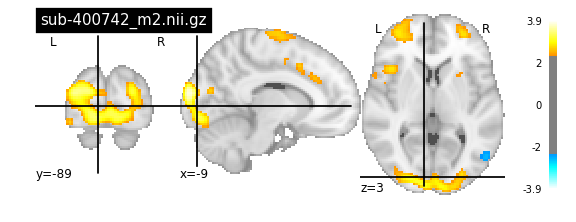

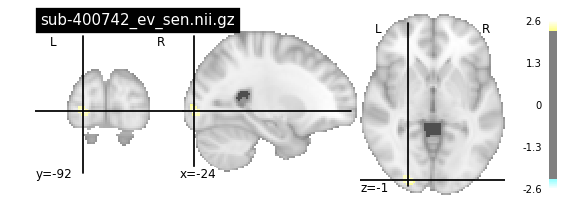

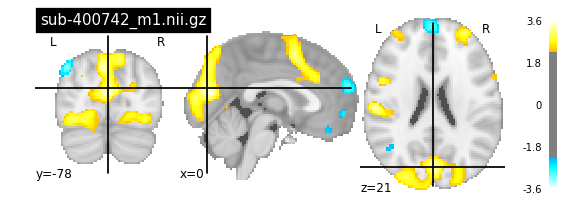

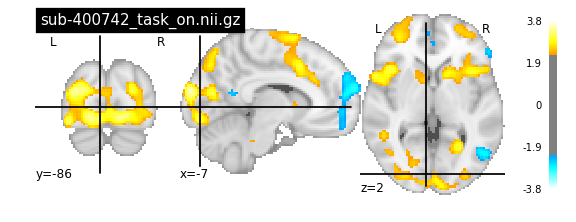

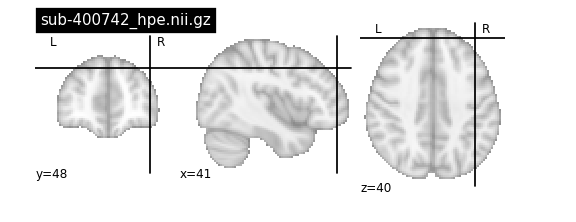

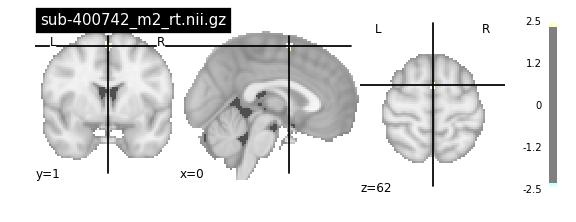

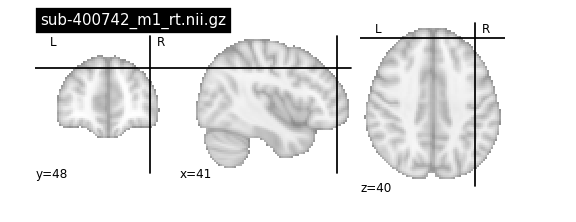

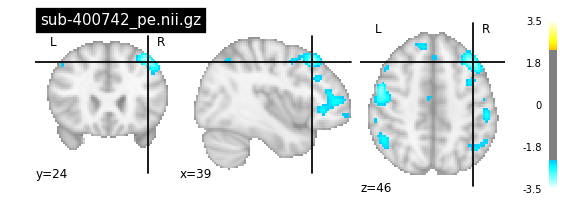

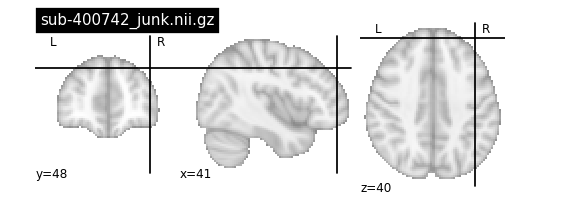

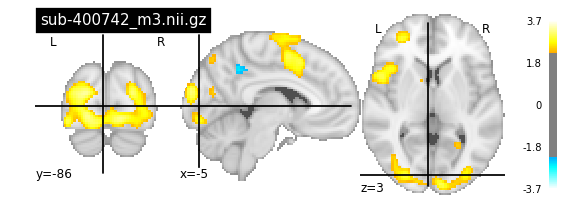

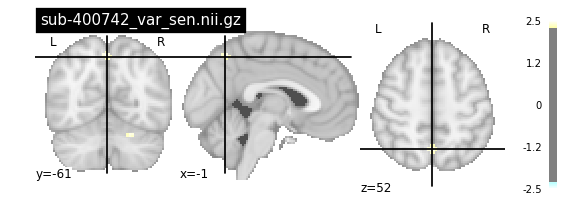

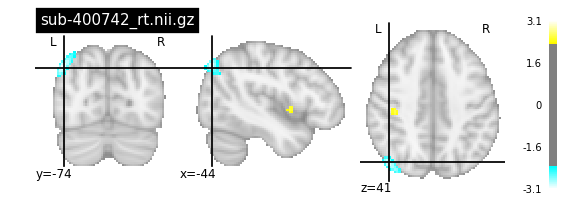

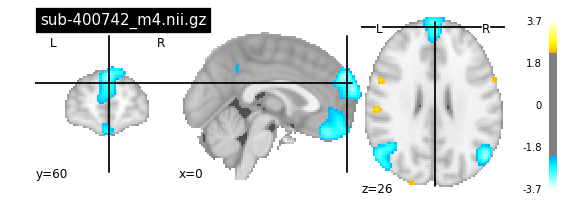

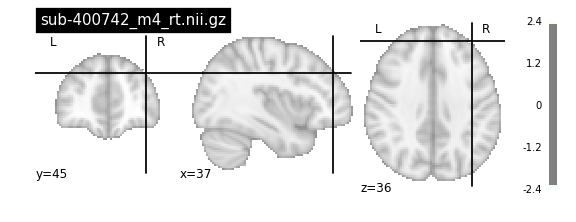

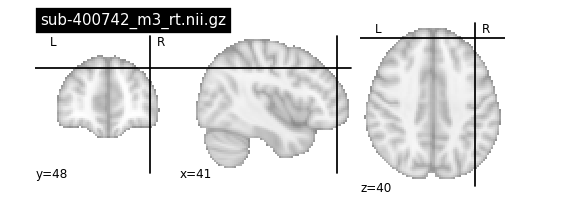

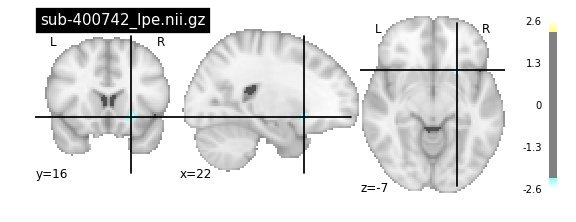

In [7]:
zmap_paths = glob.glob('%s/*'%(contrasts_path))

for t_map in zmap_paths:
    nilearn.plotting.plot_stat_map(nilearn.image.smooth_img(t_map, 8), colorbar=True, threshold=2.3, title=os.path.basename(t_map))

## Split data into first vs. second half of task

One thing we might be interested in looking is how task-related activity changes with learning throughout the task.   

A simple way to look at this would be to compare average activity for task-related regressors for the first two runs compared to the remaining runs.

In [11]:
for c in contrasts:
    second_level_input = [os.path.join(in_path,x) for x in sub_contrasts if c in x]
    a = [1]*math.floor(len(second_level_input)/2)
    a.extend([0]*(len(second_level_input)-len(a)))
    design_matrix = pd.DataFrame({'first_half': a, 'second_half': [1-x for x in a]})
    print("***********************************************")
    print("First half has %s runs; second half has %s runs"%(str(sum(design_matrix.first_half)), str(sum(design_matrix.second_half))))
    print("***********************************************")
    model = SecondLevelModel(smoothing_fwhm=5.0)

    c = re.sub("\.","",c)

    if len(second_level_input)>1:
        print("***********************************************")
        print("Running GLM for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        model = model.fit(second_level_input, design_matrix=design_matrix)

        print("***********************************************")
        print("Saving GLM for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        f = open('%s/sub-%s_%s_l2_glm_halves.pkl' %(out_path,subnum, c), 'wb')
        pickle.dump(model, f)
        f.close()

        print("***********************************************")
        print("Running contrasts for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
        for h in ['first_half', 'second_half']:
            z_map = model.compute_contrast(h,output_type='z_score')
            nib.save(z_map, '%s/sub-%s_%s_%s.nii.gz'%(contrasts_path, subnum, c, h))
            
        print("***********************************************")
        print("Done saving contrasts for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")
    elif len(second_level_input) == 1:
        print("***********************************************")
        print("1 level 1 image found for sub-%s contrast %s"%(subnum, c))
        print("Skipping level 2 for sub-%s contrast %s"%(subnum, c))
        print("Saving level 1 for level 2 for sub-%s contrast %s"%(subnum, c))
        z_map = nib.load(second_level_input[0])
        nib.save(z_map, '%s/sub-%s_%s.nii.gz'%(contrasts_path, subnum, c))
        print("***********************************************")
    else:
        print("***********************************************")
        print("No level 1 image found for sub-%s contrast %s"%(subnum, c))
        print("***********************************************")

***********************************************
First half has 3 runs; second half has 3 runs
***********************************************
***********************************************
Running GLM for sub-400742 contrast m1
***********************************************
***********************************************
Saving GLM for sub-400742 contrast m1
***********************************************
***********************************************
Running contrasts for sub-400742 contrast m1
***********************************************
***********************************************
Done saving contrasts for sub-400742 contrast m1
***********************************************
***********************************************
First half has 3 runs; second half has 3 runs
***********************************************
***********************************************
Running GLM for sub-400742 contrast m2
***********************************************
**************************

/home/users/zenkavi/.local/lib/python3.5/site-packages/nistats/regression.py:206: RuntimeWarning: invalid value encountered in true_divide
  self.wdesign.shape[1])
/home/users/zenkavi/.local/lib/python3.5/site-packages/nistats/utils.py:286: RuntimeWarning: invalid value encountered in less_equal
  return np.where(X <= 0, 0, 1. / X)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


***********************************************
Done saving contrasts for sub-400742 contrast junk
***********************************************
***********************************************
First half has 3 runs; second half has 3 runs
***********************************************
***********************************************
Running GLM for sub-400742 contrast task_on
***********************************************
***********************************************
Saving GLM for sub-400742 contrast task_on
***********************************************
***********************************************
Running contrasts for sub-400742 contrast task_on
***********************************************
***********************************************
Done saving contrasts for sub-400742 contrast task_on
***********************************************
***********************************************
First half has 15 runs; second half has 15 runs
****************************************

In [12]:
zmap_paths = glob.glob('%s/*'%(contrasts_path))

plot_contrasts = ['m1', 'm2', 'm3', 'm4', 'pe', 'ev_sen', 'var_sen']
tmp = [s + '_f' for s in plot_contrasts]
plot_contrasts = [s + '_s' for s in plot_contrasts]
plot_contrasts.extend(tmp)
del tmp

In [13]:
sub_zmap_paths = []
for p in plot_contrasts:
    sub_zmap_paths.extend([x for x in zmap_paths if p in x])
sub_zmap_paths.sort()

/home/groups/russpold/software/miniconda/envs/fmri/lib/python3.5/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/users/zenkavi/.local/lib/python3.5/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


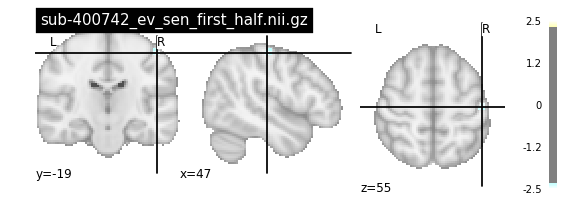

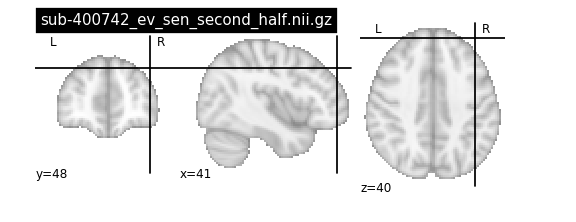

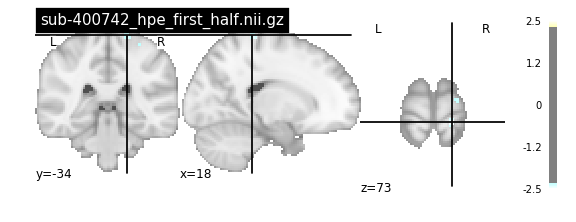

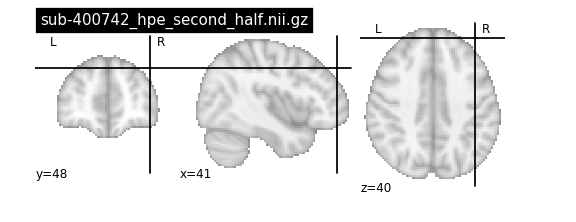

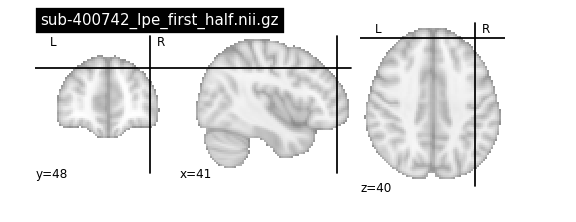

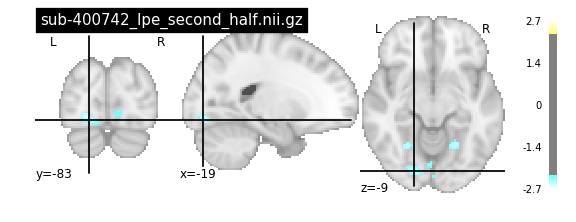

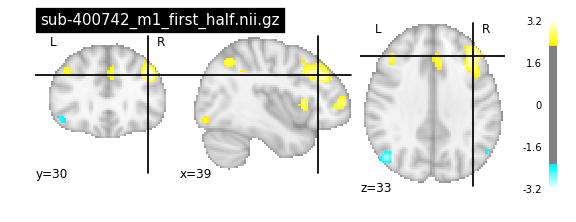

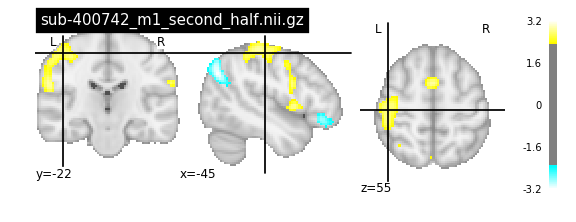

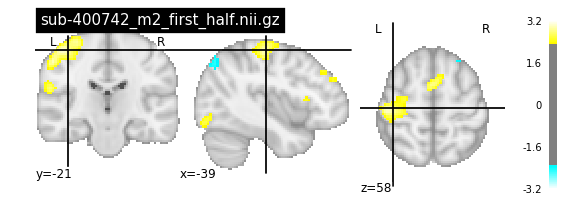

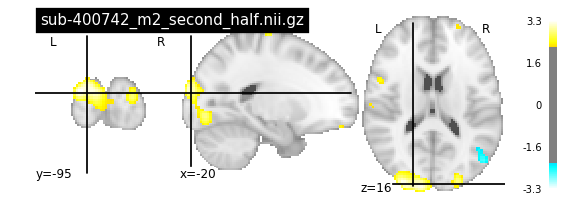

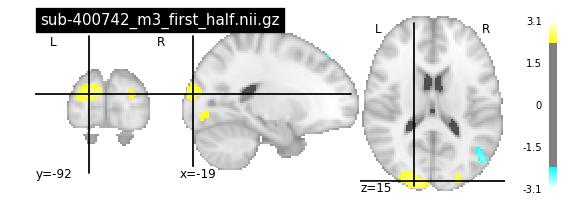

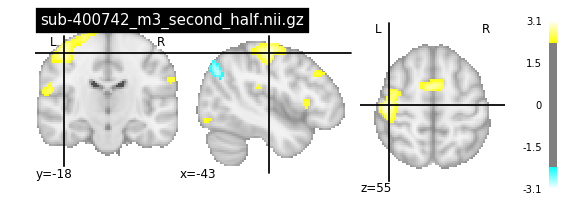

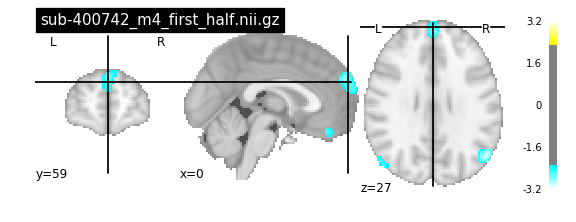

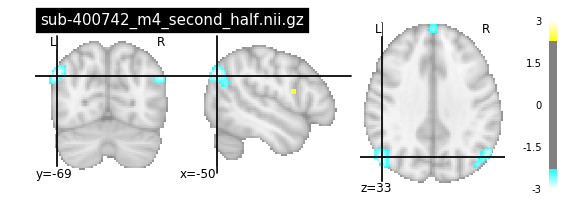

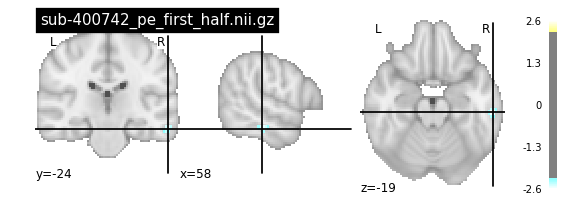

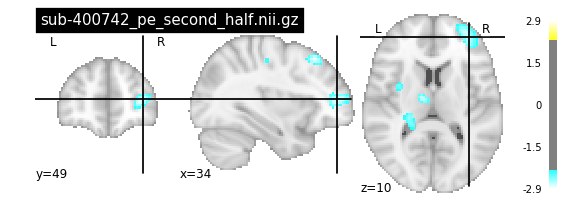

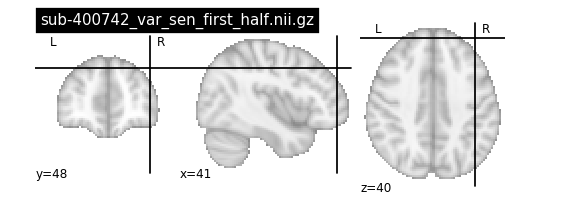

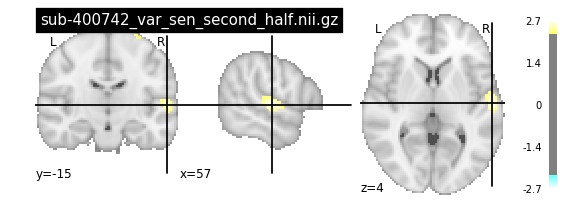

In [14]:
for t_map in sub_zmap_paths:
    nilearn.plotting.plot_stat_map(nilearn.image.smooth_img(t_map, 8), colorbar=True, threshold=2.3, title=os.path.basename(t_map))